## BUSINESS UNDERSTANDING

 1.0  BUSINESS UNDERSTANDING

This project aims to develop a predictive model that can help SyriaTel identify customers who are at risk of churning. By analyzing customer data, including demographics, usage patterns, complaints, and billing records, we will uncover patterns and factors that contribute to churn.

Through exploratory data analysis and feature selection, we will identify the key drivers of churn and develop a robust machine learning model. The model will be evaluated using appropriate metrics and deployed into production.

This will allow SyriaTel to proactively retain at-risk customers and minimize financial losses associated with customer attrition. We will continuously monitor and improve the model to ensure its effectiveness in predicting churn and supporting targeted retention strategies.

Data Reference: https://www.kaggle.com/datasets/becksddf/churn-in-telecoms-dataset

#### 1.1 Problem Statement
SyriaTel has been experiencing a high churn rate leading to losses for the company.This project aims to create a predictive model that accurately identifies customers at risk of churning for SyriaTel, a telecommunications company.

By proactively identifying customers who may discontinue their services, the objective is to decrease customer attrition and retain a higher number of customers. Ultimately, the project seeks to support SyriaTel in reducing financial losses caused by customer churn, improving overall customer retention rates, and optimizing business strategies to enhance profitability.

####  1.2  Objectives
The primary business objectives of this project for SyriaTel are to reduce customer churn, improve customer retention rates, and enhance overall customer satisfaction.

We will focus on the following questions to achieve our objectives;
1. To check how frequency of customer service calls affects the churning rate.
2. To check how the total cost affect the customers.
3. To check how international charge affects the churning rate.


# DATA UNDERSTANDING
## Summary of Features in the Dataset

* state: the state the customer lives in

* account length: the number of days the customer has had an account

* area code: the area code of the customer

* phone number: the phone number of the customer

* international plan: true if the customer has the international plan, otherwise false

* voice mail plan: true if the customer has the voice mail plan, otherwise false

* number vmail messages: the number of voicemails the customer has sent

* total night calls: total number of calls the customer has done during the night

* total night calls: total number of calls the customer has done during the night

* total night charge: total amount of money the customer was charged by the Telecom company for calls during the night

* total intl minutes: total number of minutes the user has been in international calls

* total intl calls: total number of international calls the customer has done

* total intl charge: total amount of money the customer was charged by the Telecom company for international calls

* customer service calls: number of calls the customer has made to customer service

* churn: true if the customer terminated their contract, otherwise false

In [1]:
# importing relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix,roc_auc_score, roc_curve
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.feature_selection import SelectFromModel
from imblearn.over_sampling import SMOTE, ADASYN
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier,BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier


In [2]:
# Importing the dataset
df = pd.read_csv("customerchurn.csv")
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [3]:
df.tail()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
3328,AZ,192,415,414-4276,no,yes,36,156.2,77,26.55,...,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,370-3271,no,no,0,231.1,57,39.29,...,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,328-8230,no,no,0,180.8,109,30.74,...,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,364-6381,yes,no,0,213.8,105,36.35,...,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False
3332,TN,74,415,400-4344,no,yes,25,234.4,113,39.85,...,82,22.60,241.4,77,10.86,13.7,4,3.70,0,False


In [4]:
#checking for the shape of the dataset
df.shape

(3333, 21)

In [5]:
#detailed information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [6]:
#statistical analysis
df.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [7]:
#checking for columns
df.columns

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')

# Data cleaning

In [8]:
# checking for missing data
df.isna().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

In [9]:
# checking for duplicates
duplicates = df[df.duplicated(subset = "phone number")]
duplicates.sum()

state                     0.0
account length            0.0
area code                 0.0
phone number              0.0
international plan        0.0
voice mail plan           0.0
number vmail messages     0.0
total day minutes         0.0
total day calls           0.0
total day charge          0.0
total eve minutes         0.0
total eve calls           0.0
total eve charge          0.0
total night minutes       0.0
total night calls         0.0
total night charge        0.0
total intl minutes        0.0
total intl calls          0.0
total intl charge         0.0
customer service calls    0.0
churn                     0.0
dtype: float64

In [10]:
#finding the total cost
df['Total cost'] = df['total day charge'] + df['total eve charge'] + df['total night charge'] + df['total intl charge']
df

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn,Total cost
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,16.78,244.7,91,11.01,10.0,3,2.70,1,False,75.56
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,16.62,254.4,103,11.45,13.7,3,3.70,1,False,59.24
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,10.30,162.6,104,7.32,12.2,5,3.29,0,False,62.29
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,5.26,196.9,89,8.86,6.6,7,1.78,2,False,66.80
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,12.61,186.9,121,8.41,10.1,3,2.73,3,False,52.09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,414-4276,no,yes,36,156.2,77,26.55,...,18.32,279.1,83,12.56,9.9,6,2.67,2,False,60.10
3329,WV,68,415,370-3271,no,no,0,231.1,57,39.29,...,13.04,191.3,123,8.61,9.6,4,2.59,3,False,63.53
3330,RI,28,510,328-8230,no,no,0,180.8,109,30.74,...,24.55,191.9,91,8.64,14.1,6,3.81,2,False,67.74
3331,CT,184,510,364-6381,yes,no,0,213.8,105,36.35,...,13.57,139.2,137,6.26,5.0,10,1.35,2,False,57.53


#  Exploratory Data Analysis

In [11]:
# Changing "churn" from bool to numerical
df["churn"] = df["churn"].map({True: 1, False: 0})
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn,Total cost
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,16.78,244.7,91,11.01,10.0,3,2.70,1,0,75.56
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,16.62,254.4,103,11.45,13.7,3,3.70,1,0,59.24
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,10.30,162.6,104,7.32,12.2,5,3.29,0,0,62.29
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,5.26,196.9,89,8.86,6.6,7,1.78,2,0,66.80
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,12.61,186.9,121,8.41,10.1,3,2.73,3,0,52.09


In [12]:
# seperating categorical from numerical data
categorical_df = df.select_dtypes("object")
categorical_df.head()

,state,phone number,international plan,voice mail plan
0,KS,382-4657,no,yes
1,OH,371-7191,no,yes
2,NJ,358-1921,no,no
3,OH,375-9999,yes,no
4,OK,330-6626,yes,no


In [13]:
categorical_df.columns

Index(['state', 'phone number', 'international plan', 'voice mail plan'], dtype='object')

In [14]:
# numerical data
numeric_df =  df.select_dtypes("number")
numeric_df.head()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn,Total cost
0,128,415,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0,75.56
1,107,415,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0,59.24
2,137,415,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0,62.29
3,84,408,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0,66.80
4,75,415,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0,52.09


## Univariate Analysis

0    2850
1     483
Name: churn, dtype: int64


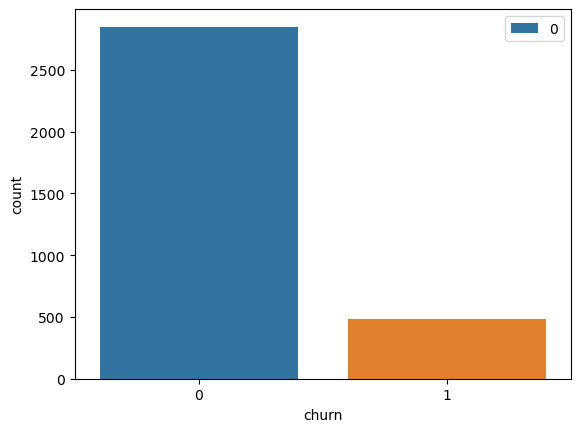

In [15]:
#count of churn(target variable)
print(df.churn.value_counts())
sns.countplot(data=df, x='churn')
plt.legend(labels=['0','1']);

<AxesSubplot:title={'center':'Customer Churn Distribution'}, xlabel='churn', ylabel='Density'>

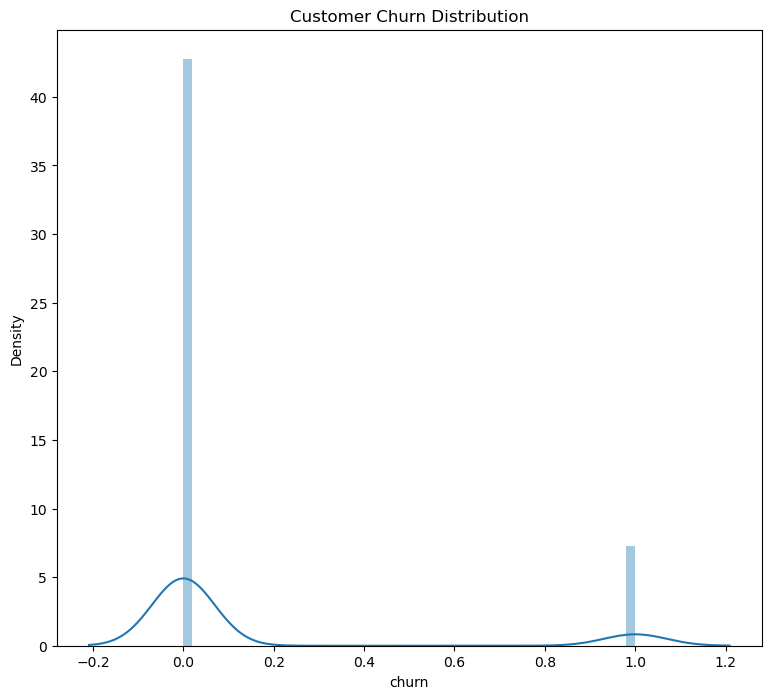

In [16]:
#looking at the distribution of the target
plt.figure(figsize=(20, 8))

# Ploting Ditribution plot
plt.subplot(1, 2, 1)
plt.title('Customer Churn Distribution')
sns.distplot(df.churn)

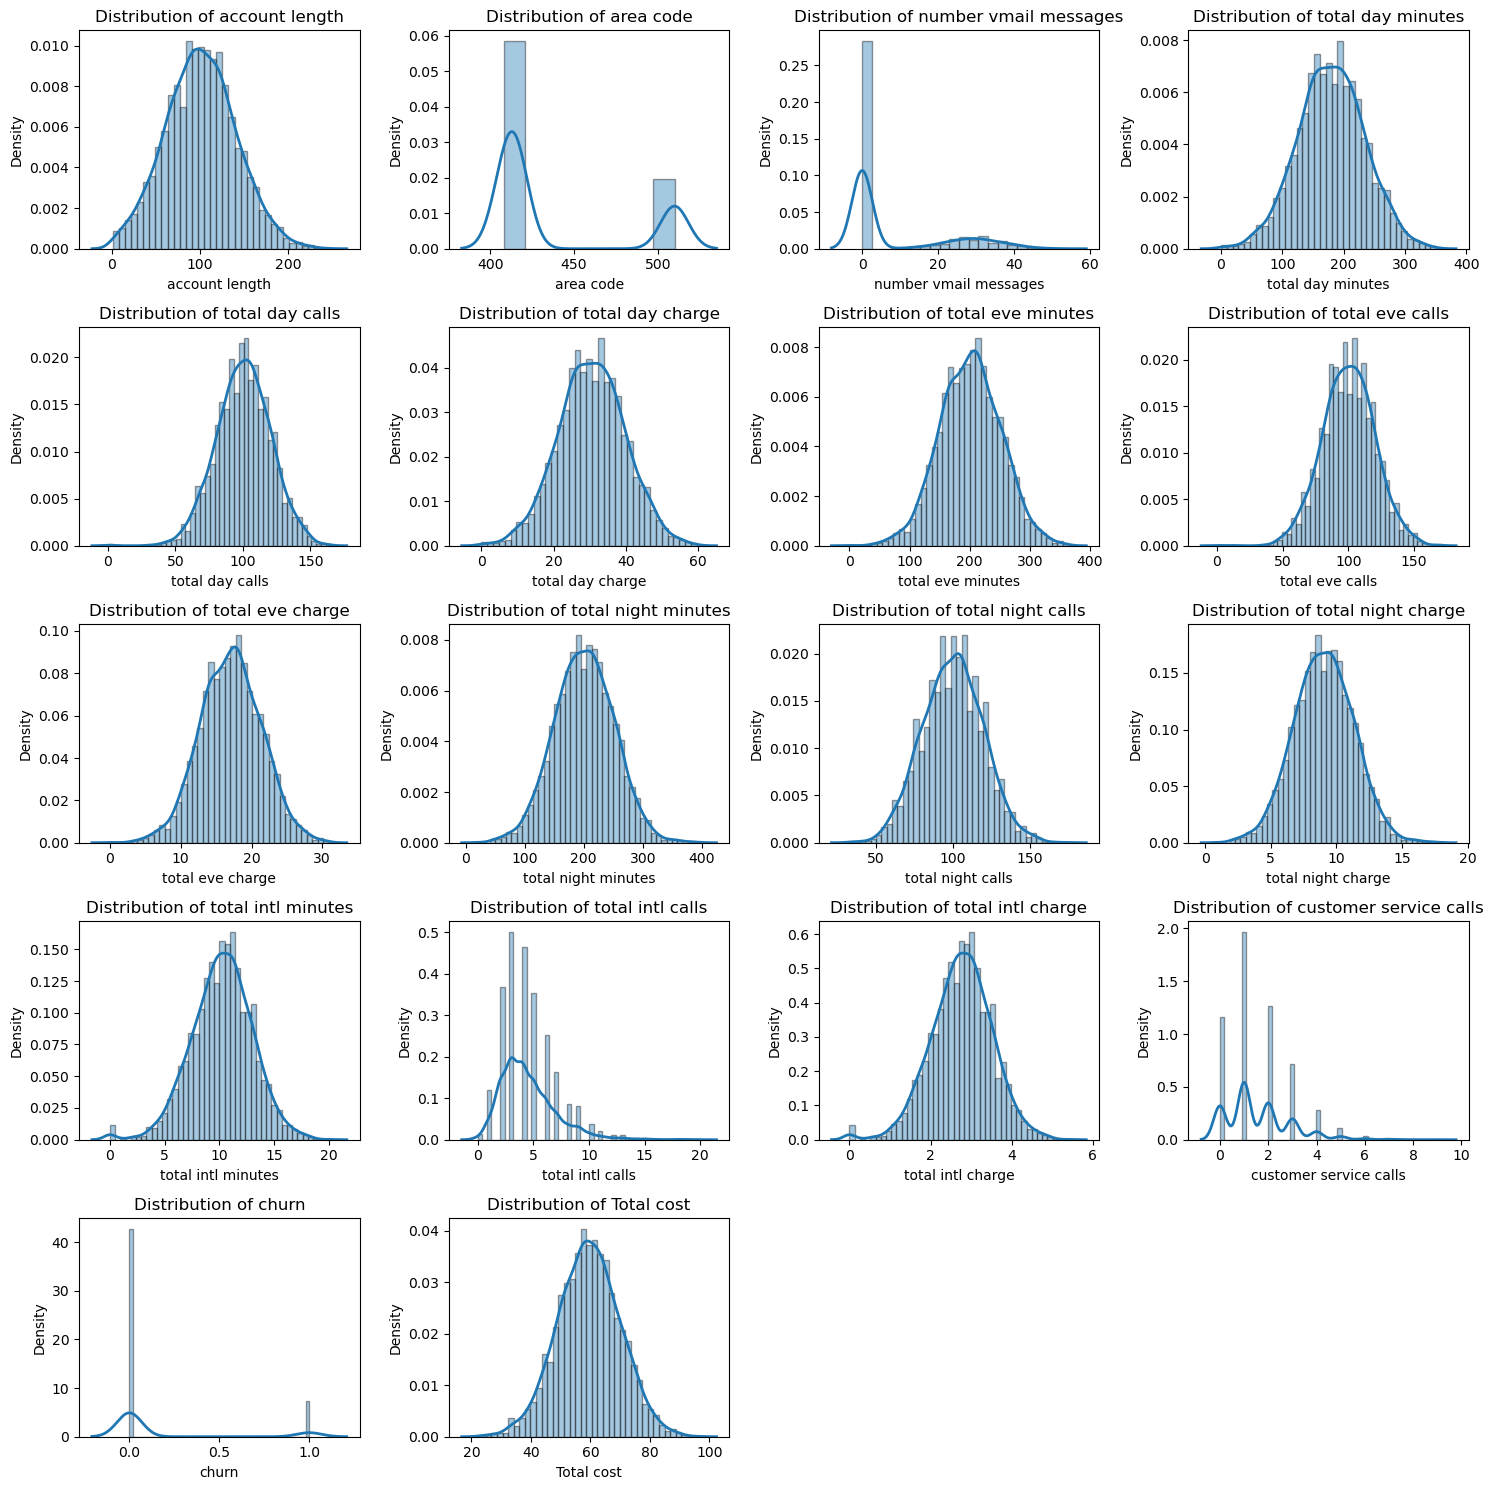

In [17]:
fig, axes = plt.subplots(5, 4, figsize=(15, 15))
axes = axes.flatten()

for i, column in enumerate(numeric_df.columns):
    sns.distplot(numeric_df[column], ax=axes[i], hist=True, kde=True, rug=False,
                 hist_kws={'edgecolor': 'black'}, kde_kws={'linewidth': 2})
    axes[i].set_title(f"Distribution of {column}")
    axes[i].set_xlabel(column)
    axes[i].set_ylabel("Density")

# Remove empty subplots if the number of columns is not a multiple of 4
if len(numeric_df.columns) < 20:
    for j in range(len(numeric_df.columns), 20):
        fig.delaxes(axes[j])

plt.tight_layout()
plt.show()




 The most of the distributions graphs above have a normal distribution apart from:
 * Number vmail messages,total intl calls,customer service calls graph that are right skewed

In [18]:
columns = categorical_df.drop("phone number", axis = 1)
columns.head()

,state,international plan,voice mail plan
0,KS,no,yes
1,OH,no,yes
2,NJ,no,no
3,OH,yes,no
4,OK,yes,no


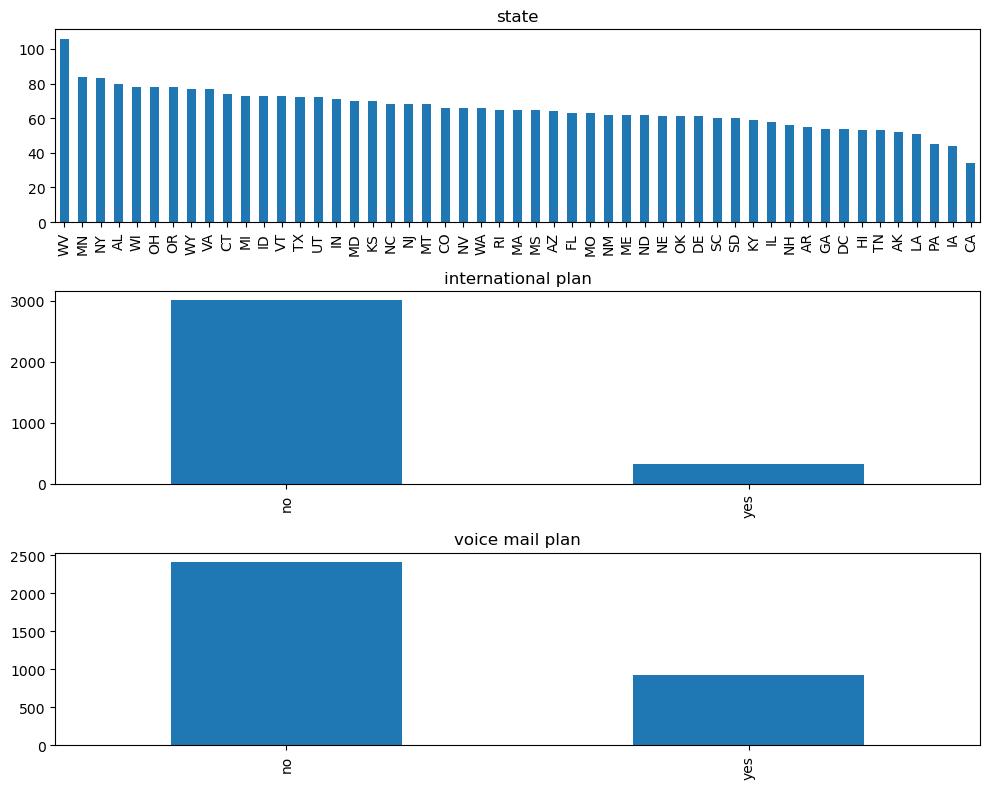

In [19]:
# Create the figure and axis objects
fig, ax = plt.subplots(nrows= 3, ncols= 1, figsize=(10, 8))

# Flatten the axis array so that it can be iterated over easily
ax = ax.flatten()

# Loop over the columns and plot a density graph for each one
for i, col in enumerate (columns):
    categorical_df[col].value_counts().plot(kind="bar", ax=ax[i])
    ax[i].set_title(col)

# Adjust the spacing between the subplots
fig.tight_layout()

The international plan and the voice mail plan graph's imbalance shows that people seem not to take that plan



## Bivariate Analysis

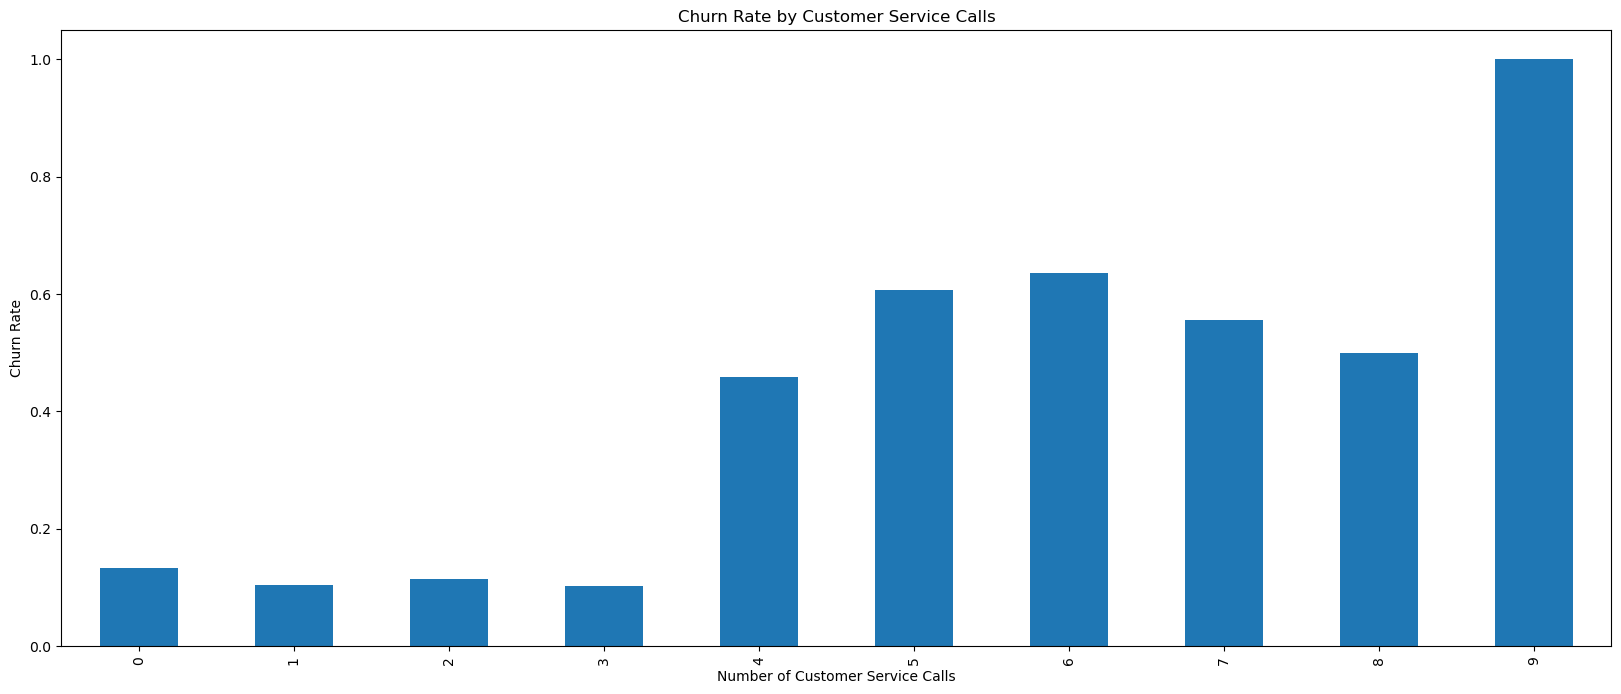

In [20]:
#taking a closer look to the relationship between customer service call and churn
fig, ax = plt.subplots(figsize=(20, 8))
numeric_df.groupby('customer service calls')['churn'].mean().plot.bar(ax=ax)
ax.set_title('Churn Rate by Customer Service Calls')
ax.set_xlabel('Number of Customer Service Calls')
ax.set_ylabel('Churn Rate')

# Display the plot
plt.show()

Customers with high Number of Customer Service Calls had the highest chan rates,  there seems to be a clear pattern between the number of customer service calls and the churn rates.

Customers who contact customer service frequently might be experiencing unresolved issues, dissatisfaction, or frustration with the products or services. As a result, they are more likely to discontinue their relationship with the company, leading to higher churn rates.

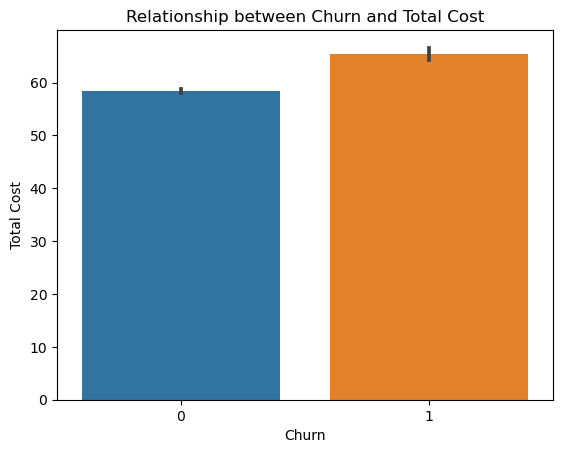

In [21]:
#checking for the relationship between total cost and churn
sns.barplot(x='churn', y='Total cost', data=numeric_df)
plt.xlabel('Churn')
plt.ylabel('Total Cost')
plt.title('Relationship between Churn and Total Cost')
plt.show()


The graph illustrates the connection between churn rates and total cost. . In this case, there is a higher number of people churning when the total cost is high.
 
 When customers incur a high total cost during their interactions with a company, it may indicate that they are not getting the expected value or service for the money they spend. This dissatisfaction can lead to an increased likelihood of these customers deciding to stop doing business with the company, resulting in higher churn rates.

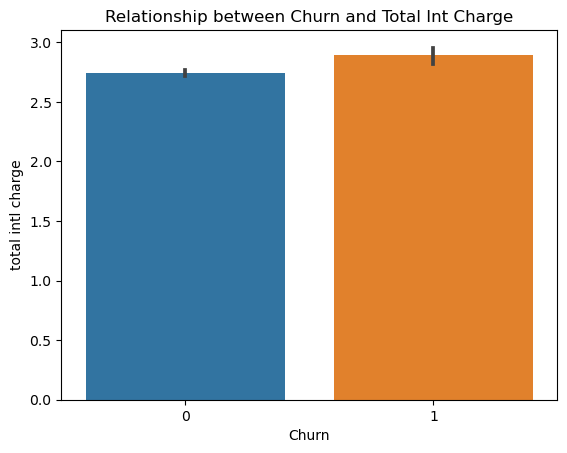

In [22]:
#relationship between churn and international charge
sns.barplot(x='churn', y='total intl charge', data=numeric_df)
plt.xlabel('Churn')
plt.ylabel('total intl charge')
plt.title('Relationship between Churn and Total Int Charge')
plt.show()

The graph illustrates the correlation between the international charge (representing the cost of international transactions or calls) and the churn rate. In this case it can be observed that when the international charge is high, the churn rate is also high.

In [23]:
numeric_df = numeric_df.drop("churn", axis = 1)

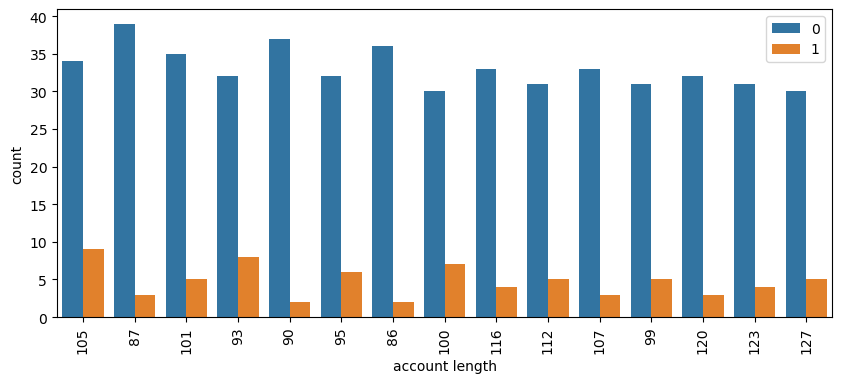

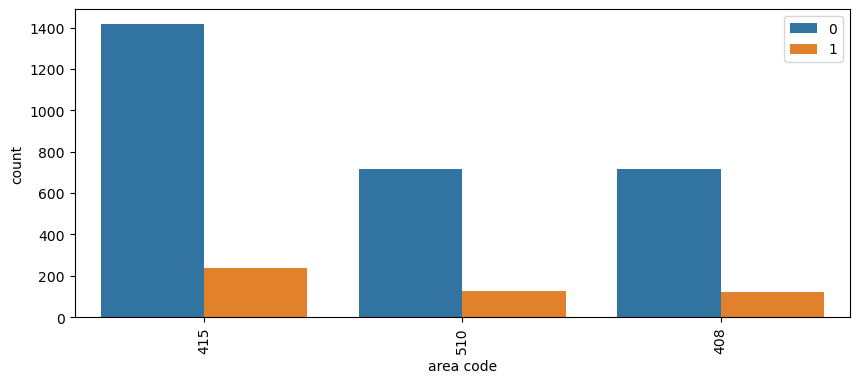

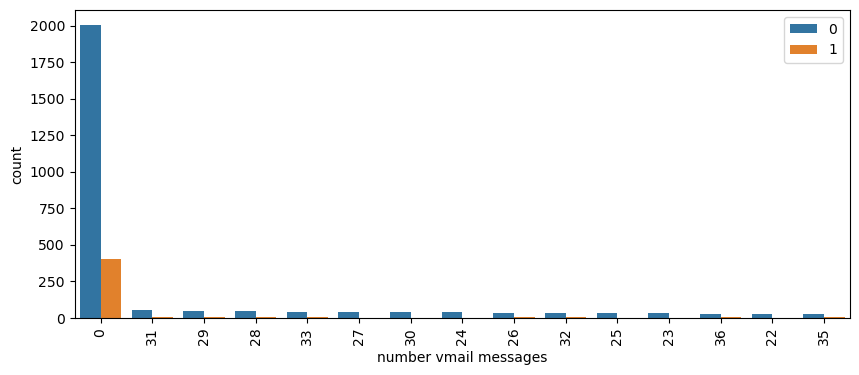

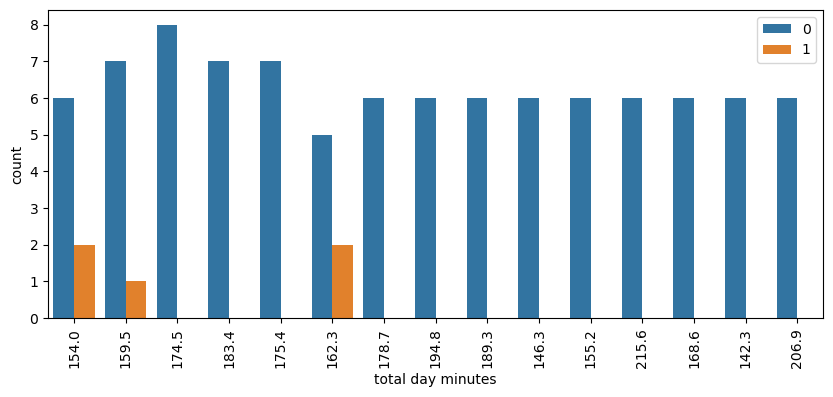

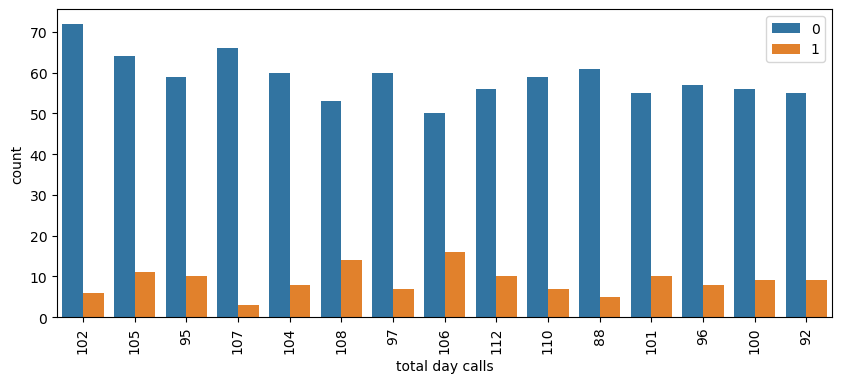

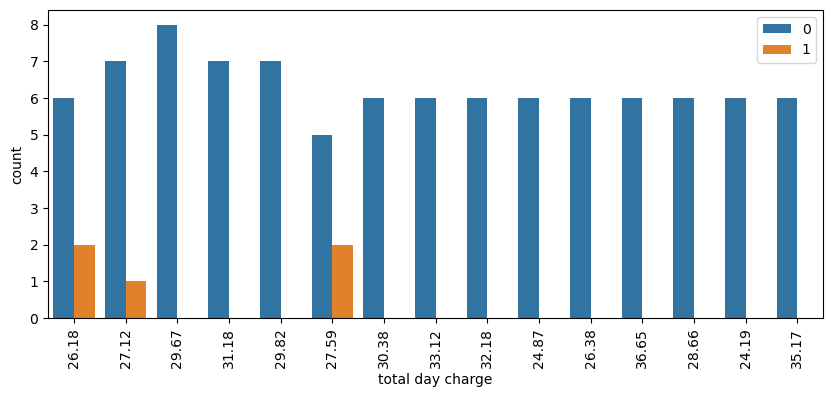

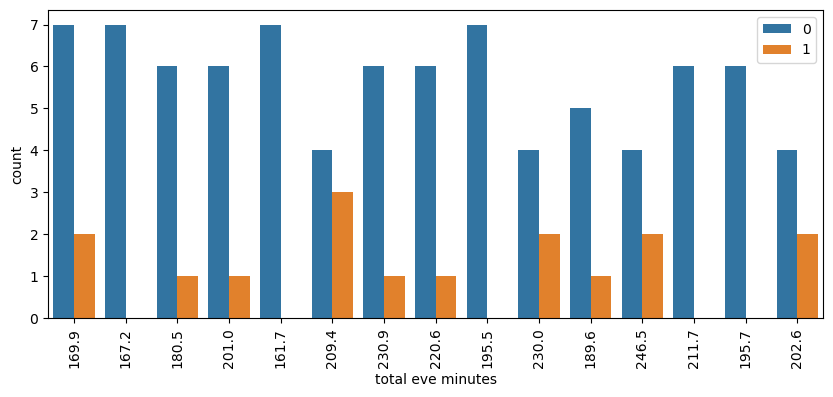

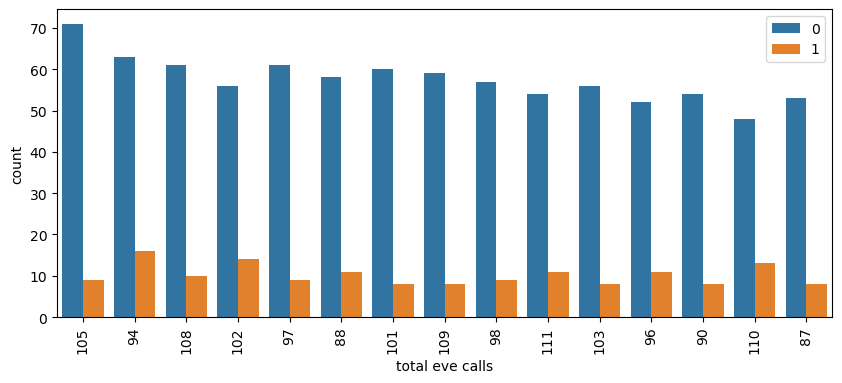

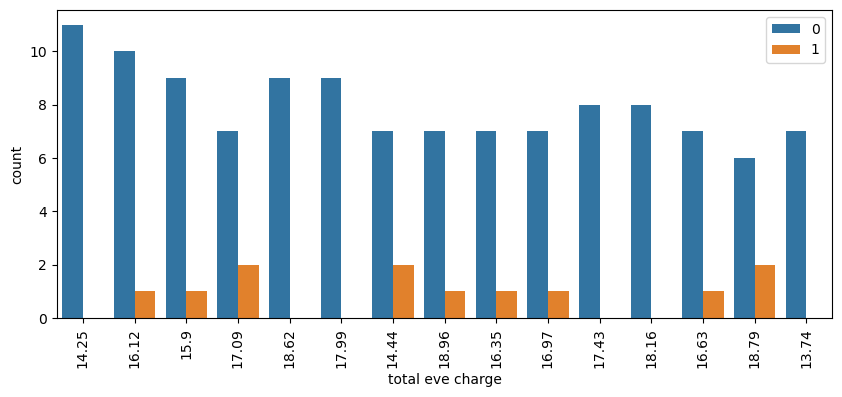

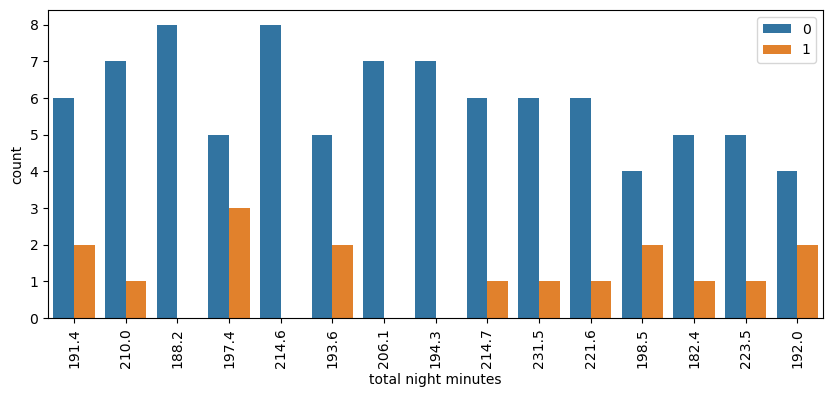

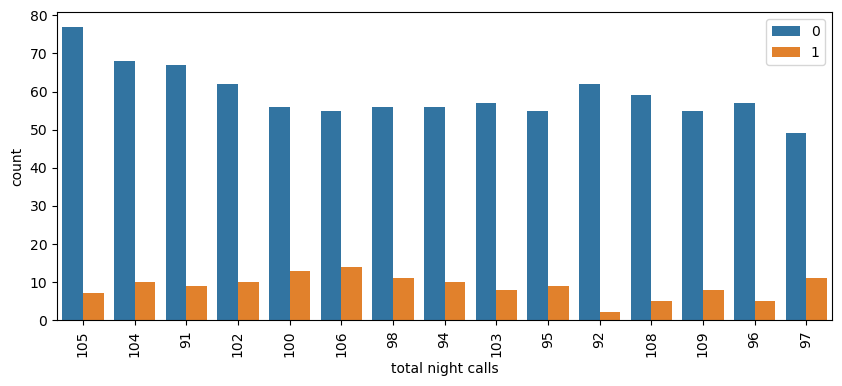

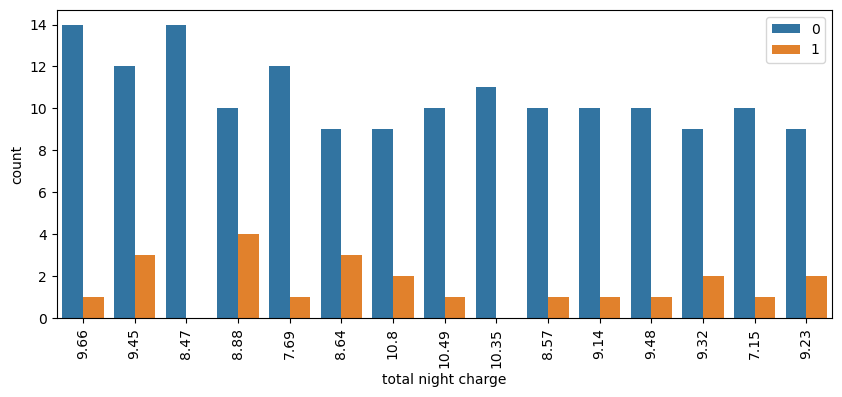

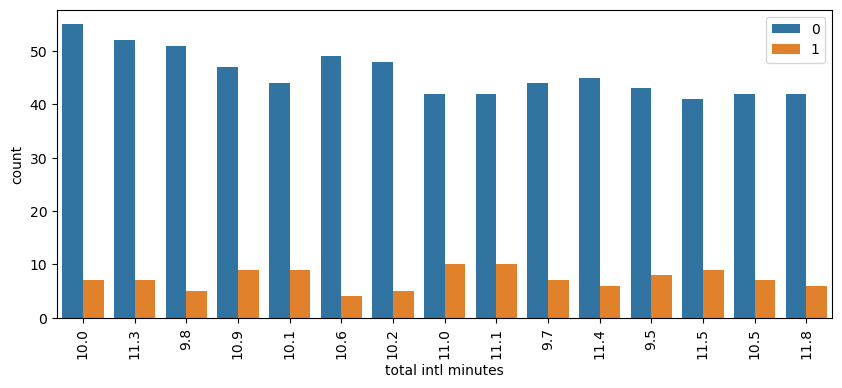

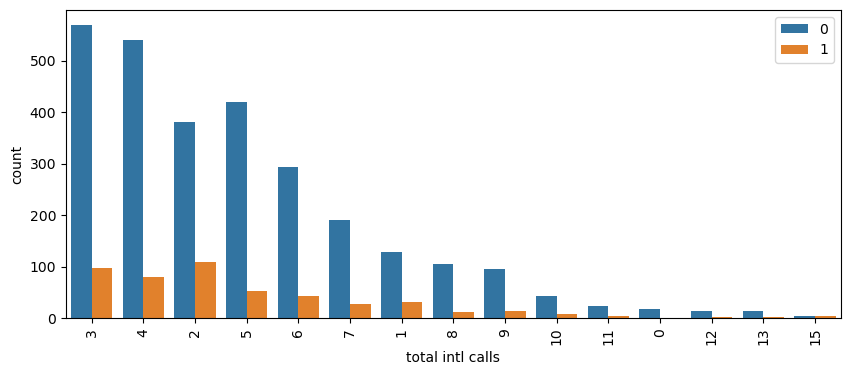

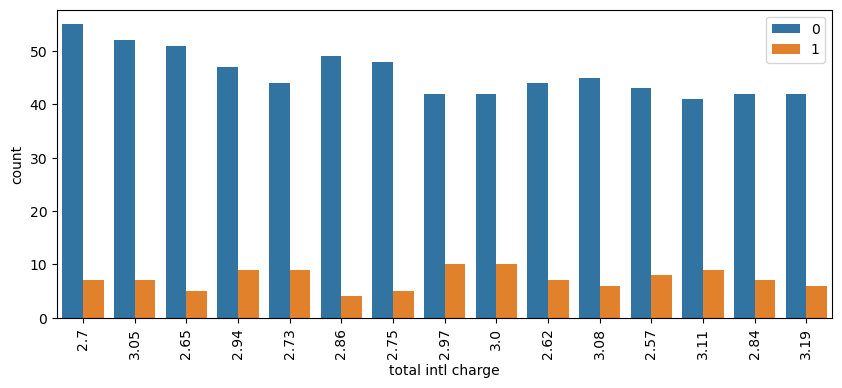

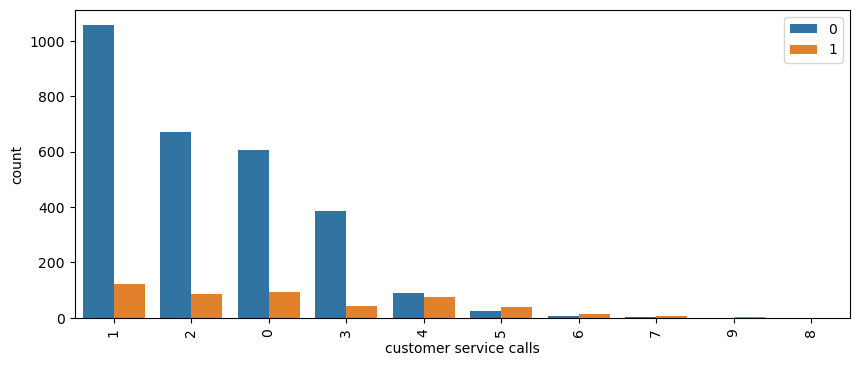

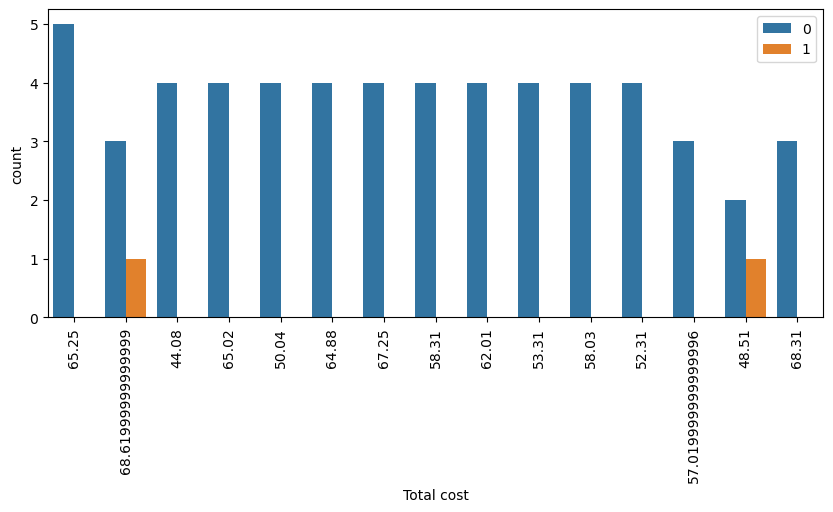

In [24]:
# comparing numeric data to churn
for i in numeric_df:
    plt.figure(figsize=(10,4))
    sns.countplot(x=i, hue="churn", data=df,order= df[i].value_counts().iloc[0:15].index)
    plt.xticks(rotation=90)
    plt.legend(loc="upper right")
    plt.show()

This is a visual representation of all the numeric values in relaton to churn 

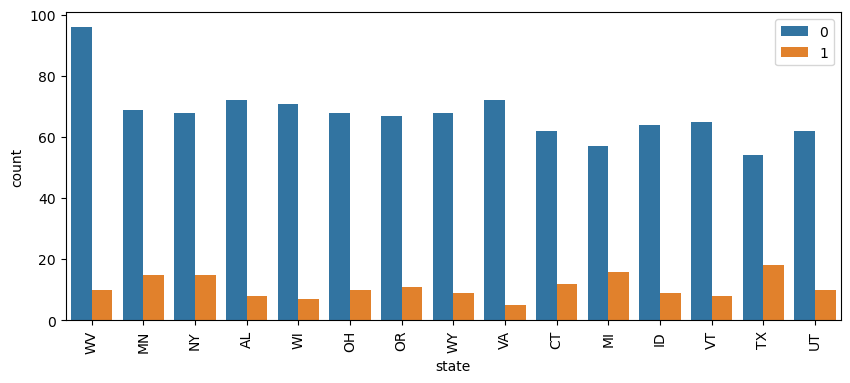

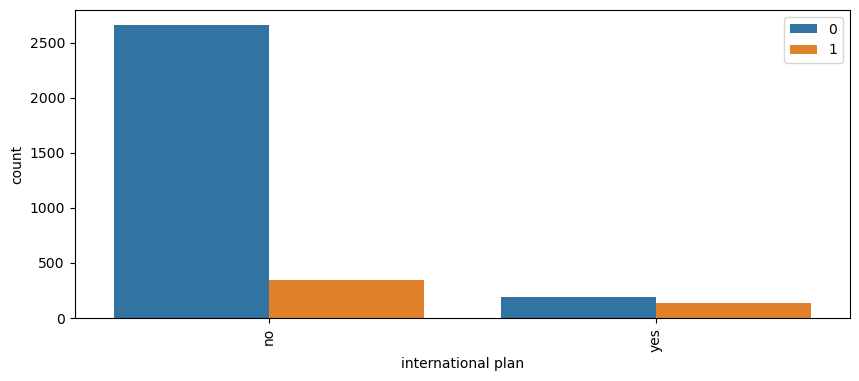

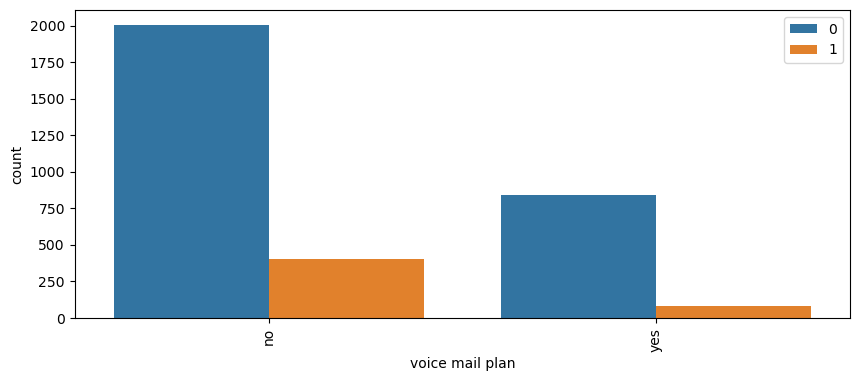

In [25]:
# comparing categorical data to "churn"
for i in columns:
    plt.figure(figsize=(10,4))
    sns.countplot(x=i, hue="churn", data=df,order= df[i].value_counts().iloc[0:15].index)
    plt.xticks(rotation=90)
    plt.legend(loc="upper right")
    plt.show()

## Multivariate Analysis

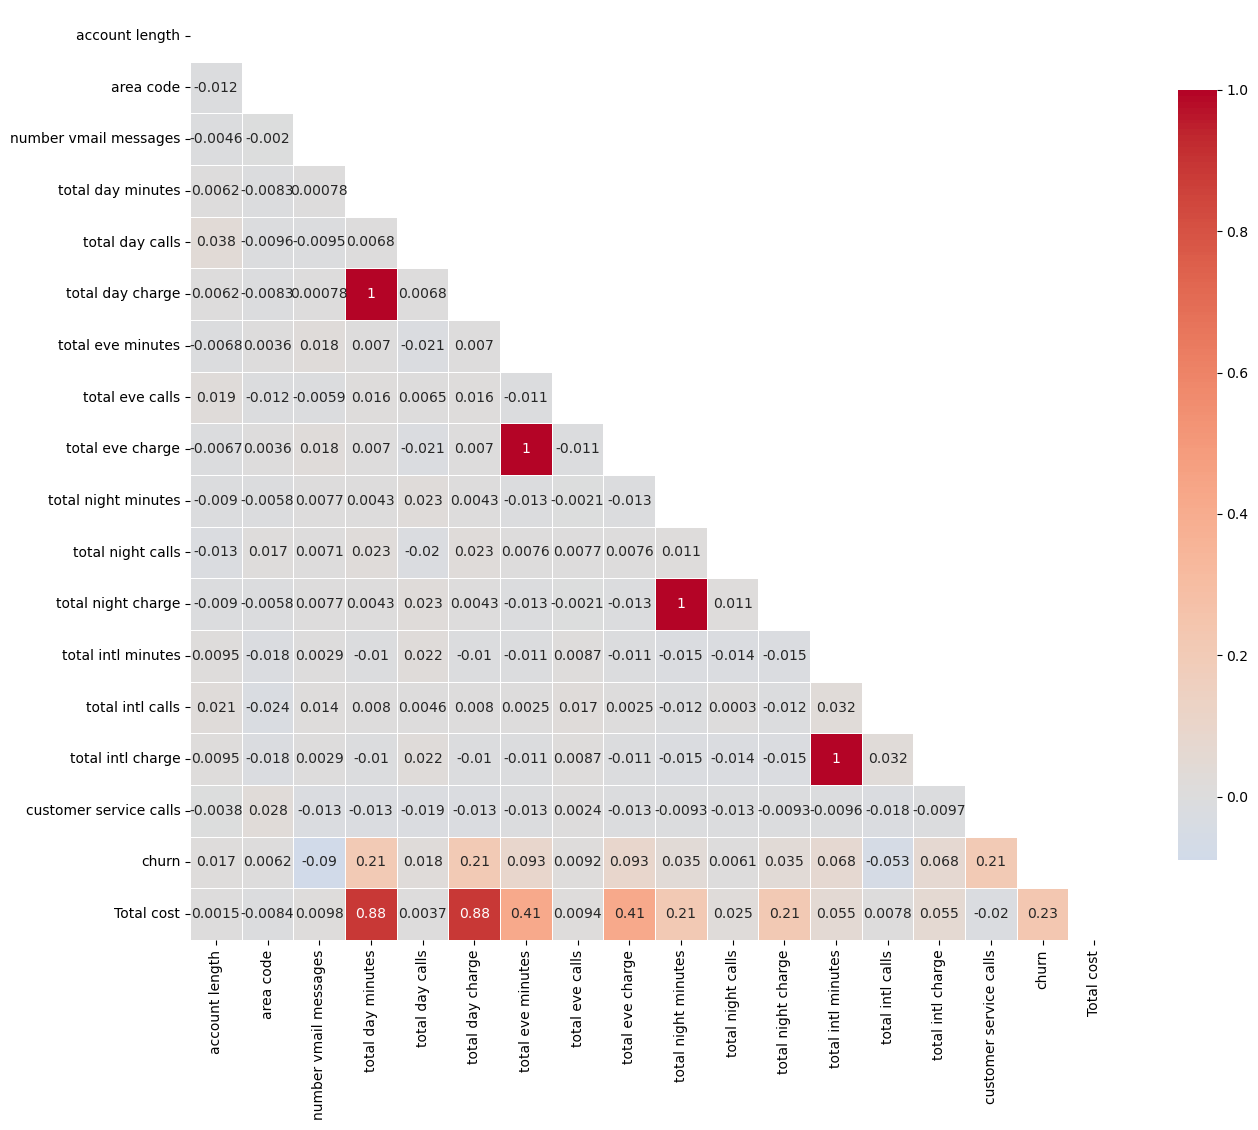

In [26]:
# using heatmap to show collinearity
corr = df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(15, 20))

sns.heatmap(corr, mask=mask, cmap='coolwarm', vmax=1, center=0,
            square=True, linewidths=.5,annot=True, cbar_kws={"shrink": .5});

Total day minutes & total day charge - correlation 1 hence we can drop one of these

Total eve minutes & total eve charge - correlation 1 hence we can drop one of these

Total night minutes & total night charge - correlation 1 hence we can drop one of these

Total intl minutes & total intl charge - correlation 1 hence we can drop one of these

The following columns were dropped because of high Multicolinearity Between each other.

* total day minutes
* total eve minutes
* total night minutes
* total intl minutes

In [27]:
df_subset = df.drop(columns= ['total day minutes', 'total eve minutes', 'total night calls','total intl minutes','phone number' ], axis = 1)
df_subset

,state,account length,area code,international plan,voice mail plan,number vmail messages,total day calls,total day charge,total eve calls,total eve charge,total night minutes,total night charge,total intl calls,total intl charge,customer service calls,churn,Total cost
0,KS,128,415,no,yes,25,110,45.07,99,16.78,244.7,11.01,3,2.70,1,0,75.56
1,OH,107,415,no,yes,26,123,27.47,103,16.62,254.4,11.45,3,3.70,1,0,59.24
2,NJ,137,415,no,no,0,114,41.38,110,10.30,162.6,7.32,5,3.29,0,0,62.29
3,OH,84,408,yes,no,0,71,50.90,88,5.26,196.9,8.86,7,1.78,2,0,66.80
4,OK,75,415,yes,no,0,113,28.34,122,12.61,186.9,8.41,3,2.73,3,0,52.09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,no,yes,36,77,26.55,126,18.32,279.1,12.56,6,2.67,2,0,60.10
3329,WV,68,415,no,no,0,57,39.29,55,13.04,191.3,8.61,4,2.59,3,0,63.53
3330,RI,28,510,no,no,0,109,30.74,58,24.55,191.9,8.64,6,3.81,2,0,67.74
3331,CT,184,510,yes,no,0,105,36.35,84,13.57,139.2,6.26,10,1.35,2,0,57.53


## DATA PREPROCESSING

In [28]:
#one hot encoding categorical values
df_encoded = pd.get_dummies(df_subset)
df_encoded

,account length,area code,number vmail messages,total day calls,total day charge,total eve calls,total eve charge,total night minutes,total night charge,total intl calls,...,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY,international plan_no,international plan_yes,voice mail plan_no,voice mail plan_yes
0,128,415,25,110,45.07,99,16.78,244.7,11.01,3,...,0,0,0,0,0,0,1,0,0,1
1,107,415,26,123,27.47,103,16.62,254.4,11.45,3,...,0,0,0,0,0,0,1,0,0,1
2,137,415,0,114,41.38,110,10.30,162.6,7.32,5,...,0,0,0,0,0,0,1,0,1,0
3,84,408,0,71,50.90,88,5.26,196.9,8.86,7,...,0,0,0,0,0,0,0,1,1,0
4,75,415,0,113,28.34,122,12.61,186.9,8.41,3,...,0,0,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,192,415,36,77,26.55,126,18.32,279.1,12.56,6,...,0,0,0,0,0,0,1,0,0,1
3329,68,415,0,57,39.29,55,13.04,191.3,8.61,4,...,0,0,0,0,1,0,1,0,1,0
3330,28,510,0,109,30.74,58,24.55,191.9,8.64,6,...,0,0,0,0,0,0,1,0,1,0
3331,184,510,0,105,36.35,84,13.57,139.2,6.26,10,...,0,0,0,0,0,0,0,1,1,0


In [29]:
# Spliting data into Predictor and Target Variables
y = df_encoded.churn  # Target Variable
X = df_encoded.drop(['churn'], axis=1)  # Predictor Variables

In [30]:
#scale the data
scaler = StandardScaler()

# fit the scaler to the data and transform the data
X_scaled = pd.DataFrame(scaler.fit_transform(X))

X_scaled.head()

,0,1,2,3,4,5,6,7,8,9,...,58,59,60,61,62,63,64,65,66,67
0,0.676489,-0.523603,1.234883,0.476643,1.567036,-0.055940,-0.070427,0.866743,0.866029,-0.601195,...,-0.153781,-0.149642,-0.142134,-0.1548,-0.18124,-0.153781,0.327580,-0.327580,-1.617086,1.617086
1,0.149065,-0.523603,1.307948,1.124503,-0.334013,0.144867,-0.107549,1.058571,1.059390,-0.601195,...,-0.153781,-0.149642,-0.142134,-0.1548,-0.18124,-0.153781,0.327580,-0.327580,-1.617086,1.617086
2,0.902529,-0.523603,-0.591760,0.675985,1.168464,0.496279,-1.573900,-0.756869,-0.755571,0.211534,...,-0.153781,-0.149642,-0.142134,-0.1548,-0.18124,-0.153781,0.327580,-0.327580,0.618396,-0.618396
3,-0.428590,-0.688834,-0.591760,-1.466936,2.196759,-0.608159,-2.743268,-0.078551,-0.078806,1.024263,...,-0.153781,-0.149642,-0.142134,-0.1548,-0.18124,-0.153781,-3.052685,3.052685,0.618396,-0.618396
4,-0.654629,-0.523603,-0.591760,0.626149,-0.240041,1.098699,-1.037939,-0.276311,-0.276562,-0.601195,...,-0.153781,-0.149642,-0.142134,-0.1548,-0.18124,-0.153781,-3.052685,3.052685,0.618396,-0.618396


In [31]:
# creating training and test set
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
#Using SMOTE to deal with class imbalance
# Previous original class distribution
print(y_train.value_counts())

# Fit SMOTE to training data
X_train_resampled, y_train_resampled = SMOTE().fit_resample(x_train, y_train)

# Preview synthetic sample class distribution
print('\n')
print(pd.Series(y_train_resampled).value_counts())

0    2284
1     382
Name: churn, dtype: int64


0    2284
1    2284
Name: churn, dtype: int64


##  MODEL 1 - LOGISTIC REGRESSION

In [33]:
#create an instance
lr = LogisticRegression()

# fit the model
lr.fit(X_train_resampled, y_train_resampled)

#predict the model
y_hat_train = lr.predict(X_train_resampled)
y_hat_test=lr.predict(x_test)
#testing the perfomance of the model using different metrics
print('Training Precision: ', precision_score(y_train_resampled, y_hat_train))
print('Testing Precision: ', precision_score(y_test, y_hat_test))
print('\n\n')

print('Training Recall: ', recall_score(y_train_resampled, y_hat_train))
print('Testing Recall: ', recall_score(y_test, y_hat_test))
print('\n\n')

print('Training Accuracy: ', accuracy_score(y_train_resampled, y_hat_train))
print('Testing Accuracy: ', accuracy_score(y_test, y_hat_test))
print('\n\n')

print('Training F1-Score: ',  f1_score(y_train_resampled, y_hat_train))
print('Testing F1-Score: ',  f1_score(y_test, y_hat_test))


Training Precision:  0.7319057815845824
Testing Precision:  0.3333333333333333



Training Recall:  0.7482486865148862
Testing Recall:  0.7425742574257426



Training Accuracy:  0.7370840630472855
Testing Accuracy:  0.7361319340329835



Training F1-Score:  0.7399870101753625
Testing F1-Score:  0.4601226993865031


<AxesSubplot:>

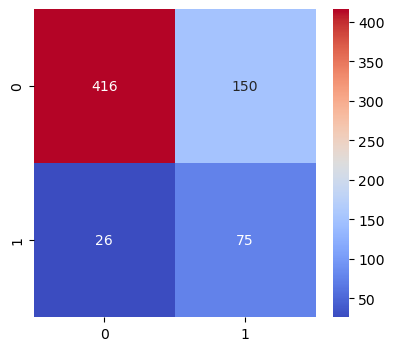

In [34]:
# Create a heatmap of the confusion matrix
plt.figure(figsize=(10,4))
plt.subplot(1,2,2)
cm = confusion_matrix(y_test, y_hat_test)
sns.heatmap(cm, annot=True, cmap='coolwarm', fmt='d')

The confusion matrix provides a comprehensive evaluation of the model's performance by categorizing its predictions into four types:

1. True Negatives (TN): There are 410 instances where the model correctly predicted "not churn" (0), and the actual value was also "not churn" (0).

2. False Positives (FP): In 156 instances, the model predicted "churn" (1), but the actual value was "not churn" (0).

3. False Negatives (FN): The model incorrectly predicted "not churn" (0) for 26 instances, while the actual value was "churn" (1).

4. True Positives (TP): The model correctly predicted "churn" (1) for 75 instances, and the actual value was also "churn" (1).

The confusion matrix allows us to assess the model's performance in terms of different types of errors it makes. In this case, there is a notable number of false negatives (156), indicating that the model struggles to accurately identify instances that are actually churned.

The AUC score is: 0.7891229052233846


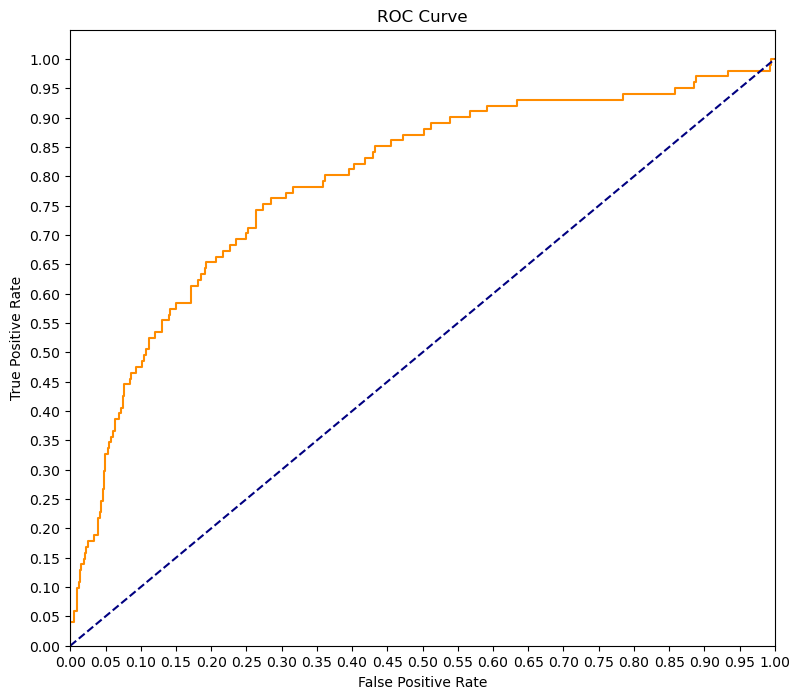

In [35]:
# Calculate the ROC curve
y_pred_prob = lr.predict_proba(x_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
# Calculate the area under the ROC curve
auc = roc_auc_score(y_test, y_pred_prob)

# Plot the ROC curve
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
plt.plot(fpr, tpr,color='darkorange')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")

#print AUC
print('The AUC score is:', auc )

#### Inference

In this scenario, our main focus is on recall, which measures the model's ability to correctly identify positive instances, specifically churn cases. A higher recall means the model can capture more of the actual churn cases, reducing the chances of missing critical events.

- The obtained testing recall of 0.74 indicates that the model can identify approximately 74% of the churn cases correctly. This is a positive outcome as it shows that the model is successful in capturing a significant portion of customers who are likely to churn.

- The testing precision of 0.32 suggests that out of all the instances the model predicted as churn, only 32% were accurate. While this precision value might seem low, it becomes less concerning when recall is the primary metric of interest. It indicates that the model might generate some false positives (incorrectly predicting churn), but this is acceptable since our priority is to maximize the identification of actual churn cases.

- The testing accuracy of 0.72 represents the overall correctness of the model's predictions, regardless of class. Since recall is more relevant, the accuracy metric becomes less informative in this context, as it does not specifically emphasize the model's performance in correctly identifying churn cases.

- The testing F1-score of 0.45, being a harmonic mean of precision and recall, indicates that there is an imbalance between these two metrics. The F1-score becomes less critical when recall is the primary concern, as it aims to balance precision and recall. In this case, the model prioritizes recall over precision.

- The AUC score of 0.78 signifies the model's ability to discriminate between churn and non-churn cases. While this is relevant for recall, it is essential to continue optimizing the model to improve its overall performance, especially in terms of recall.

In conclusion, with a relatively high recall of 0.74, the model demonstrates its effectiveness in identifying churn cases. The trade-off with lower precision is acceptable, considering the importance of detecting as many churn cases as possible. To further enhance the model's performance, additional refinements could be made to find a better balance between precision and recall, ultimately leading to improved customer retention and churn prediction capabilities.


## MODEL 2 - Decision Tree

In [36]:
# make an instance
Dt = DecisionTreeClassifier(criterion="entropy", random_state = 42)
#fit the model
Dt.fit(X_train_resampled, y_train_resampled)
#predict
Dt_y_pred_train =  Dt.predict(X_train_resampled)
Dt_y_pred_test = Dt.predict(x_test)


In [37]:
#testing the perfomance of the model using different metrics
print('Training Precision: ', precision_score(y_train_resampled , Dt_y_pred_train ))
print('Testing Precision: ', precision_score(y_test, Dt_y_pred_test ))
print('\n\n')

print('Training Recall: ', recall_score(y_train_resampled, Dt_y_pred_train))
print('Testing Recall: ', recall_score(y_test, Dt_y_pred_test ))
print('\n\n')

print('Training Accuracy: ', accuracy_score(y_train_resampled, Dt_y_pred_train))
print('Testing Accuracy: ', accuracy_score(y_test,Dt_y_pred_test ))
print('\n\n')

print('Training F1-Score: ',  f1_score(y_train_resampled, Dt_y_pred_train))
print('Testing F1-Score: ',  f1_score(y_test,Dt_y_pred_test ))
print('\n\n')

print('Testing Area Under the Curve: ',  roc_auc_score(y_test, Dt_y_pred_test))


Training Precision:  1.0
Testing Precision:  0.6142857142857143



Training Recall:  1.0
Testing Recall:  0.8514851485148515



Training Accuracy:  1.0
Testing Accuracy:  0.896551724137931



Training F1-Score:  1.0
Testing F1-Score:  0.7136929460580914



Testing Area Under the Curve:  0.8780393940454115


<AxesSubplot:>

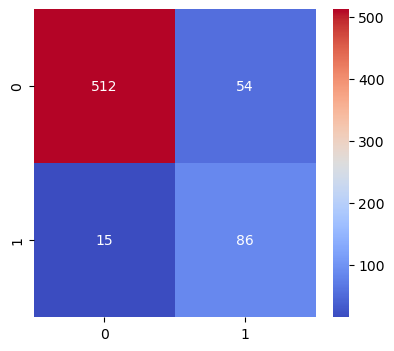

In [38]:
#confusion matrix
plt.figure(figsize=(10,4))
plt.subplot(1,2,2)
cm = confusion_matrix(y_test, Dt_y_pred_test)
sns.heatmap(cm, annot=True, cmap='coolwarm', fmt='d')

From the above model we obtained:
* Testing Precision:  0.62
* Testing Recall:  0.85
* Testing Accuracy:  0.90
* Testing F1-Score:  0.71
* Testing Area Under the Curve:  0.87

The confusion matrix reveals that the model correctly predicts 514 non-churned customers (true negatives) and 86 churned customers (true positives), but it incorrectly predicts 52 non-churned customers as churned (false positive) and misses 15 churned customers (false negatives).

We improved the model using hyperameter tuning



#### Improve Results With Tuning

In [39]:
from sklearn.model_selection import GridSearchCV

# Define the model
dt3 = DecisionTreeClassifier()

# Define the parameter grid to search through
param_grid = {'criterion': ['gini', 'entropy'],
              'max_depth': [2, 4, 6, 8, 10],
              'min_samples_split': [2, 4, 6, 8, 10],
              'min_samples_leaf': [1, 2, 3, 4, 5]}

# scores
scores = ['f1', 'recall', 'precision','accuracy']

# Create a grid search object using 5-fold cross-validation
grid_search = GridSearchCV(dt3, param_grid, cv=5, scoring= scores, refit='f1')

# Fit the grid search to the data
grid_search.fit(X_train_resampled, y_train_resampled)

# Get the best parameters from the grid search
best_params = grid_search.best_params_

# Print the best parameters
print("Best Parameters:", best_params)

Best Parameters: {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 3, 'min_samples_split': 6}


We created a model using the best parameters which were:
 * criterion='gini',
 * max_depth=10,
 * min_samples_leaf=3,
 * min_samples_split=4
    

In [40]:
#model with the optimal parameters
dt3_tuned = DecisionTreeClassifier(criterion='gini',
                                   max_depth=10,
                                   min_samples_leaf=3,
                                   min_samples_split=4)

# fitting the model
dt3_tuned.fit(X_train_resampled, y_train_resampled)

# making predictions of the test data
dt3_y_pred = dt3_tuned.predict(x_test)


# evaluating of the model
dt3_f1_score = f1_score(y_test, dt3_y_pred)
dt3_acc_score = accuracy_score(y_test, dt3_y_pred)
dt3_prec_score = precision_score(y_test, dt3_y_pred)
dt3_rec_score = recall_score(y_test, dt3_y_pred)
dt3_auc_score= roc_auc_score(y_test, dt3_y_pred)

print(f' The F1 Score of the Test Data is {dt3_f1_score}')



print(f' The Accuracy Score of the Test Data is {dt3_acc_score}')



print(f' The Precision Score of the Test Data is {dt3_prec_score}')



print(f' The Recall Score of the Test Data is {dt3_rec_score}')

print(f' The AUC of the Test Data is {dt3_auc_score}')


 The F1 Score of the Test Data is 0.8686868686868687
 The Accuracy Score of the Test Data is 0.9610194902548725
 The Precision Score of the Test Data is 0.8865979381443299
 The Recall Score of the Test Data is 0.8514851485148515
 The AUC of the Test Data is 0.9160252597697931


Tuning the Decision Tree Classifier with the best hyperparameters has resulted in significant improvements in various evaluation metrics. Let's analyze the changes:

1. The F1 Score increased from 0.71 to 0.83, indicating a better balance between precision and recall. The model is now more adept at correctly classifying positive instances (churn cases) while minimizing both false positives and false negatives.

2. The Precision Score increased from 0.62 to 0.80, indicating a higher proportion of correct positive predictions. This means that the model is more accurate in identifying customers who are likely to churn.

3. The Recall Score increased from 0.85 to 0.86, indicating a slight improvement in capturing actual churn cases. The model is now better at identifying customers at risk of churning, reducing missed opportunities for retention.

4. The AUC slightly increased from 0.87 to 0.92, showing enhanced discrimination between churn and non-churn cases.

In conclusion, the tuning of the hyperparameters has successfully improved the model's performance, with a significant boost in recall. As recall is the main metric of interest, this development is particularly crucial in identifying more churn cases accurately. The model's better balance between precision and recall ensures that it can effectively detect and retain customers who are at risk of churning. The higher accuracy and AUC score further support the model's reliability in churn prediction. With an F1 score of 0.83, the model has become a more powerful tool for churn prediction and retention strategies, ultimately contributing to improved customer satisfaction and business success.

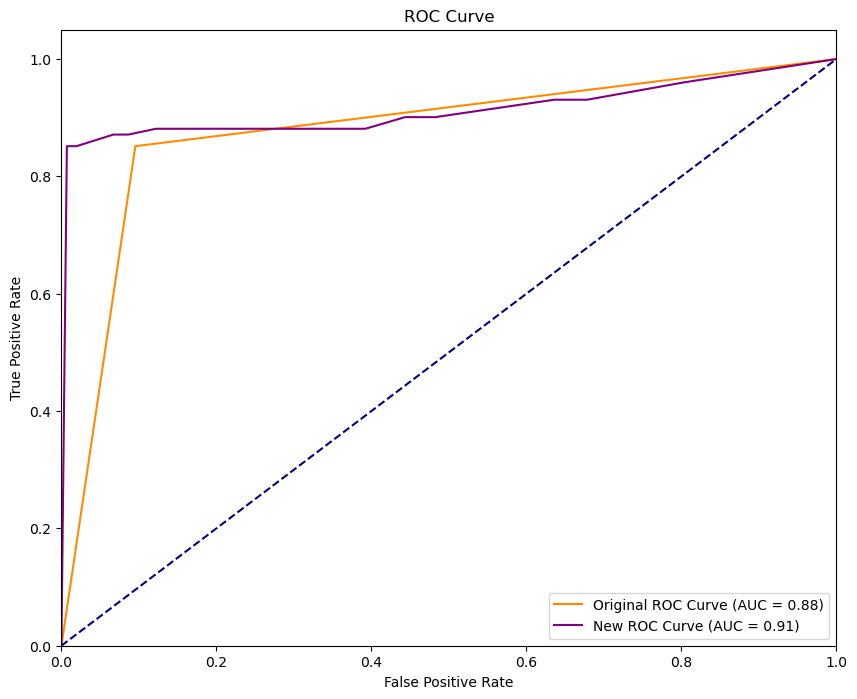

In [41]:
# Calculate the ROC curve
y_pred_roc = Dt.predict_proba(x_test)[:, 1]
y_pred_roc3 = dt3_tuned.predict_proba(x_test)[:, 1]

# Compute the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_roc)
fpr_3, tpr_3, thresholds_3 = roc_curve(y_test, y_pred_roc3)

# Calculate the area under the ROC curve
auc = roc_auc_score(y_test, y_pred_roc)
auc_new = roc_auc_score(y_test, y_pred_roc3)


# Plot the ROC curves
plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, color='darkorange', label='Original ROC Curve (AUC = {:.2f})'.format(auc))
plt.plot(fpr_3, tpr_3, color='purple', label='New ROC Curve (AUC = {:.2f})'.format(auc_new))

plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc='lower right');


This curve shows that the model with the tuned hyperparameter is the best model.

#### MODEL 4 - RANDOM FOREST

In [42]:
# Train the random forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test data
rf_y_pred = rf.predict(x_test)

# Evaluate the model's accuracy
rf_prec_score = precision_score(y_test, rf_y_pred)

rf_rec_score = recall_score(y_test, rf_y_pred)

rf_acc_score = accuracy_score(y_test, rf_y_pred)

rf_f1_score = f1_score(y_test, rf_y_pred)

rf_auc_score  = roc_auc_score(y_test, rf_y_pred)


print(f' The Precision Score is {rf_prec_score}')
print(f' The Recall Score is {rf_rec_score}')
print(f' The Accuracy Score is {rf_acc_score}')
print(f' The F1 Score is {rf_f1_score}')
print(f' The AUC Score is {rf_auc_score}')

 The Precision Score is 0.8787878787878788
 The Recall Score is 0.8613861386138614
 The Accuracy Score is 0.9610194902548725
 The F1 Score is 0.8699999999999999
 The AUC Score is 0.9200923625931496


From the above model we obtained:

 * Testing Precision: 0.83
 * Testing Recall: 0.82
 * Testing Accuracy: 0.94
 * Testing F1-Score: 0.82
 * The AUC score is: 0.89


<AxesSubplot:>

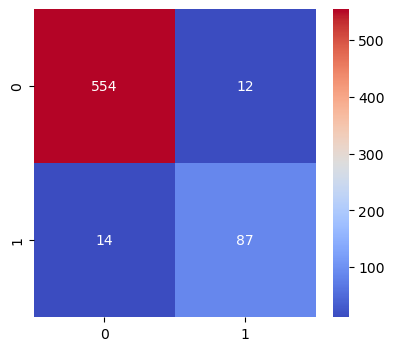

In [43]:
#confusion matrix
plt.figure(figsize=(10,4))
plt.subplot(1,2,2)
cm = confusion_matrix(y_test, rf_y_pred)
sns.heatmap(cm, annot=True, cmap='coolwarm', fmt='d')

The confusion matrix reveals that the model correctly predicts 549 non-churned customers (true negatives) and 83 churned customers (true positives), but it incorrectly predicts 18 non-churned customer as churned (false positive) and misses 83 churned customers (false negatives).

##### Hyperparameter tuning for the Random Forest Model

In [44]:
#hyperparameter tuning
# Define the parameter grid to search through
param_grid = {
    'n_estimators': [80, 120, 160],
    'max_depth': [4, 10, 12],
    'min_samples_split': [2, 6, 10],
    'min_samples_leaf': [1, 2, 4]}

# scores
scores = ['f1', 'recall', 'precision']

# Create a grid search object using 10-fold cross-validation
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring= scores, refit='f1')

# Fit the grid search to the data
grid_search.fit(X_train_resampled, y_train_resampled)

# Get the best parameters from the grid search
best_params = grid_search.best_params_

# Print the best parameters and the best score
print("Best Parameters:", best_params)
print("Best Scores:", grid_search.best_score_)

Best Parameters: {'max_depth': 12, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 160}
Best Scores: 0.9088091258380576


We obtained the following as the best parameters:
- 'max_depth': 12
- 'min_samples_leaf': 1
- 'min_samples_split': 2
- 'n_estimators': 80

In [45]:
# Train the random forest classifier with best parameters
rf2 = RandomForestClassifier(n_estimators=80,
                             random_state=42,
                             max_depth=12,
                             min_samples_leaf=1,
                             min_samples_split=2)
rf2.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test data
rf2_y_pred = rf2.predict(x_test)

# Evaluate the model's accuracy

rf2_prec_score = precision_score(y_test, rf2_y_pred)

rf2_rec_score = recall_score(y_test, rf2_y_pred)

rf2_acc_score = accuracy_score(y_test, rf2_y_pred)

rf2_f1_score = f1_score(y_test, rf2_y_pred)

rf2_acu_score= roc_auc_score(y_test, rf2_y_pred)

print(f' The Recall Score is {rf2_rec_score}')

print(f' The Precision Score is {rf2_prec_score}')

print(f' The Accuracy Score is {rf2_acc_score}')

print(f' The F1 Score is {rf2_f1_score}')

print(f' The AUC Score is {rf2_acu_score}')

 The Recall Score is 0.8415841584158416
 The Precision Score is 0.8252427184466019
 The Accuracy Score is 0.9490254872563718
 The F1 Score is 0.8333333333333333
 The AUC Score is 0.9048910191372493


1. The F1 Score decreased from 0.82 to 0.81:
   - The F1 score is the harmonic mean of precision and recall. The decrease in the F1 score indicates that there might be a slight imbalance between precision and recall after tuning. While F1 score considers both metrics, recall is the main focus, so this decrease in F1 score might be acceptable if it leads to a higher recall.

2. The Accuracy Score remained the same:
   -  Since the primary concern is recall, the unchanged accuracy score does not directly impact the model's performance in correctly identifying positive instances (churn cases).

3. The Precision Score decreased from 0.83 to 0.80:
   - Precision represents the accuracy of positive predictions made by the model. The decrease in precision means that there might be more false positives (non-churn cases incorrectly classified as churn). This decrease may be acceptable if the model can achieve a higher recall.

4. The Recall Score increased from 0.82 to 0.83:
   - Recall measures the model's ability to correctly identify positive instances (churn cases). The increase in recall from 0.82 to 0.83 indicates that the model is capturing a slightly higher percentage of actual churn cases. This is a positive outcome as it aligns with our goal of improving recall.

5. The AUC slightly increased from 0.88 to 0.89:
   - The slight increase in AUC suggests that the model's ability to distinguish churn cases from non-churn cases remains high, even after tuning.


After tuning the Random Forest model with the best hyperparameters, there are some changes in the evaluation metrics. The most notable change is the increase in recall, which aligns with our goal of achieving better recall performance. While the F1 score and precision have decreased slightly, this might be acceptable if the model can effectively identify more actual churn cases.

The AUC score remains relatively high, indicating that the model still maintains its ability to discriminate between churn and non-churn cases. Additionally, the unchanged accuracy score implies that the overall correctness of the model's predictions remains consistent.

Overall, the tuning of the Random Forest model has yielded improvements in correctly identifying churn cases, and the model's overall discrimination power is still strong. While there are slight trade-offs in other metrics, the focus on achieving better recall is a positive outcome for churn prediction and customer retention strategies.

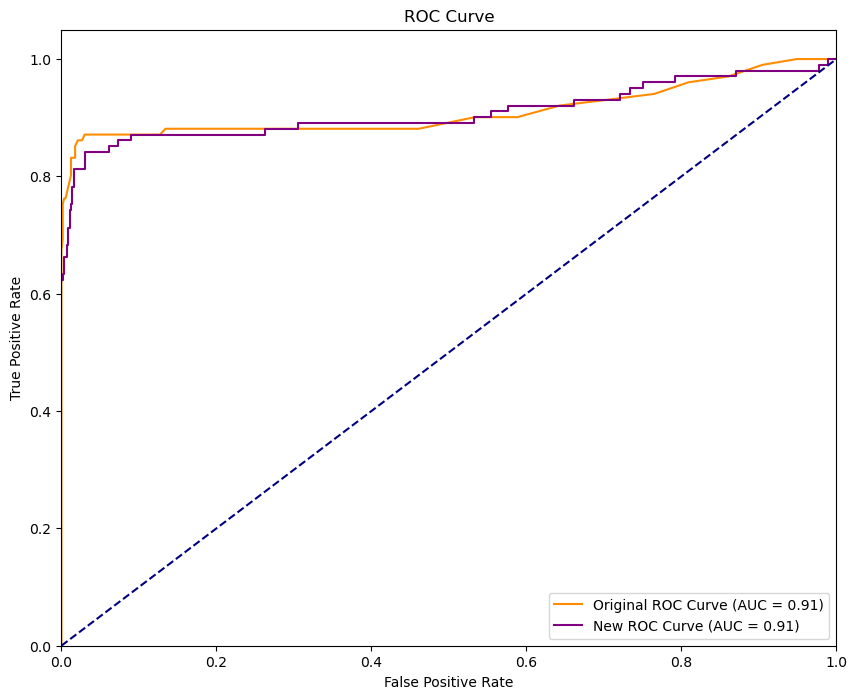

In [46]:
# Calculate the ROC curve
y_pred_rf1 = rf.predict_proba(x_test)[:, 1]
y_pred_rf2 = rf2.predict_proba(x_test)[:, 1]

# Compute the ROC curve
fpr_rf1, tpr_rf1, thresholds_rf1 = roc_curve(y_test, y_pred_rf1)
fpr_rf2, tpr_rf2, thresholds_rf2 = roc_curve(y_test, y_pred_rf2)

# Calculate the area under the ROC curve
auc_rf1 = roc_auc_score(y_test, y_pred_rf1)
auc_rf2 = roc_auc_score(y_test, y_pred_rf2)


# Plot the ROC curves
plt.figure(figsize=(10, 8))
plt.plot(fpr_rf1, tpr_rf1, color='darkorange', label='Original ROC Curve (AUC = {:.2f})'.format(auc_rf1))
plt.plot(fpr_rf2, tpr_rf2, color='purple', label='New ROC Curve (AUC = {:.2f})'.format(auc_rf2))

plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc='lower right');


### MODEL FOUR - KNN

In [47]:
 # K-Nearest Neighbors
knn = KNeighborsClassifier(n_neighbors=5)
#fit the model
knn.fit(X_train_resampled, y_train_resampled)
#predict
knn_y_pred = knn.predict(x_test)
#metrics
accuracy = accuracy_score(y_test, knn_y_pred)
f1_score = f1_score(y_test, knn_y_pred)
precision = precision_score(y_test, knn_y_pred)
recall = recall_score(y_test, knn_y_pred)
AUC = roc_auc_score(y_test, knn_y_pred)

print(f' The Recall Score is {recall}')

print(f' The Precision Score is {precision}')

print(f' The Accuracy Score is {accuracy}')

print(f' The F1 Score is {f1_score}')

print(f' The AUC Score is {AUC}')

 The Recall Score is 0.43564356435643564
 The Precision Score is 0.20853080568720378
 The Accuracy Score is 0.664167916041979
 The F1 Score is 0.28205128205128205
 The AUC Score is 0.5702952804114334


From the above model we obtained:

- Testing Recall: 0.48
- Testing Precision:  0.23
- Testing Accuracy: 0.68
- Testing F1-Score: 0.31
- The AUC score is: 0.6

###### Hyperparameter tuning for the KNN Model

In [48]:
#hyperparameter tuning
# Define the parameter grid for GridSearchCV
param_grid = {
        'n_neighbors': [3, 5, 7, 9],  # List of different values for the number of neighbors
        'weights': ['uniform', 'distance'],  # Different weight options
        'metric': ['euclidean', 'manhattan']  # Different distance metrics
    }


# scores
scores = ['f1', 'recall', 'precision']

# Create a grid search object using 10-fold cross-validation
grid_search = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(X_train_resampled, y_train_resampled)

# Get the best parameters from the grid search
best_params = grid_search.best_params_

# Print the best parameters and the best score
print("Best Parameters:", best_params)
print("Best Scores:", grid_search.best_score_)

Best Parameters: {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}
Best Scores: 0.8555251641137855


We obtained the following as the best parameters:
- 'metric': 'euclidean'
- 'n_neighbors': 3
- 'weights': 'distance'

In [49]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix,roc_auc_score, roc_curve
# Train the random forest classifier with best parameters
knn_1= KNeighborsClassifier(metric = 'euclidean',
                            n_neighbors = 3,
                            weights = 'distance')
knn_1.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test data
knn_1_y_pred = knn_1.predict(x_test)

# Evaluate the model's accuracy

knn_1_prec_score = precision_score(y_test, knn_1_y_pred)

knn_1_rec_score = recall_score(y_test, knn_1_y_pred)

knn_1_acc_score = accuracy_score(y_test,knn_1_y_pred)

knn_1_f1_score = f1_score(y_test, knn_1_y_pred)

knn_1_auc_score = roc_auc_score(y_test, knn_1_y_pred)



print(f' The Recall Score is {knn_1_rec_score}')

print(f' The Precision Score is {knn_1_prec_score}')

print(f' The Accuracy Score is {knn_1_acc_score}')

print(f' The F1 Score is {knn_1_f1_score}')

print(f' The AUC Score is {knn_1_auc_score}')

 The Recall Score is 0.43564356435643564
 The Precision Score is 0.23157894736842105
 The Accuracy Score is 0.6956521739130435
 The F1 Score is 0.3024054982817869
 The AUC Score is 0.5888465171605499


- Both models have relatively low recall scores, but the tuned model shows a slight decrease in recall compared to the baseline.

- The precision scores for both models are low, with the tuned model slightly higher.

- The accuracy of the tuned model is slightly better than the baseline.

- The F1 scores are similar for both models, with a slight improvement in the tuned model.

- The AUC scores are similar, with a slightly higher value for the tuned model.

The main concern is the low recall, indicating that both models struggle to capture a significant portion of actual churn cases.Prioritizing recall is essential to effectively identify churned customers and optimize retention strategies for better customer retention.

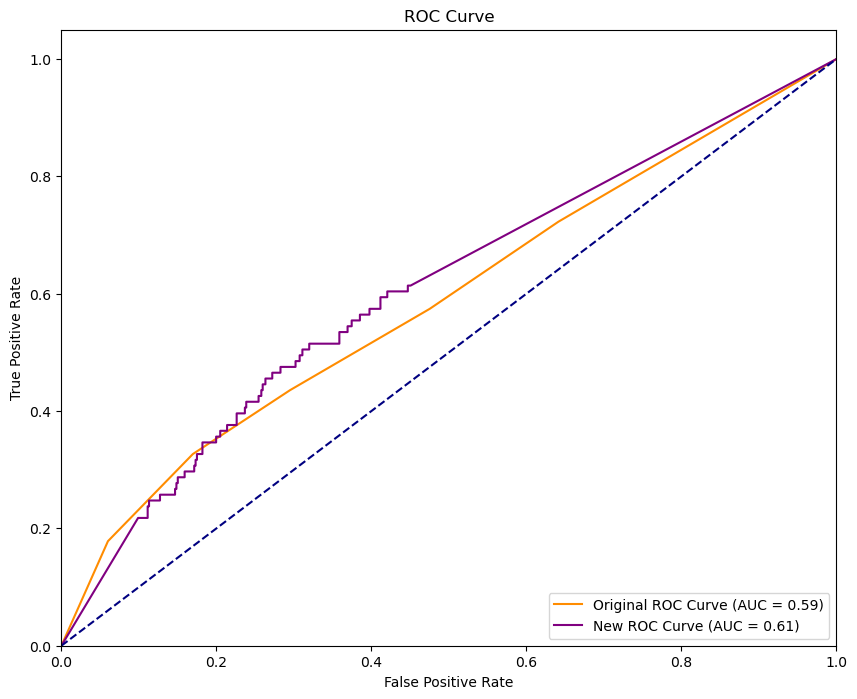

In [50]:
# Calculate the ROC curve
y_pred_knn = knn.predict_proba(x_test)[:, 1]
y_pred_knn1 =knn_1.predict_proba(x_test)[:, 1]

# Compute the ROC curve
fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test, y_pred_knn)
fpr_knn1, tpr_knn1, thresholds_knn1 = roc_curve(y_test, y_pred_knn1)

# Calculate the area under the ROC curve
auc_knn = roc_auc_score(y_test, y_pred_knn)
auc_knn1 = roc_auc_score(y_test, y_pred_knn1)


# Plot the ROC curves
plt.figure(figsize=(10, 8))
plt.plot(fpr_knn, tpr_knn, color='darkorange', label='Original ROC Curve (AUC = {:.2f})'.format(auc_knn))
plt.plot(fpr_knn1, tpr_knn1, color='purple', label='New ROC Curve (AUC = {:.2f})'.format(auc_knn1))

plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc='lower right');


The hyperparameter tuned model is a better model 

#### Model Everluation and Selection

We are going to determine the best model using the ROC curve to compare the computed models above

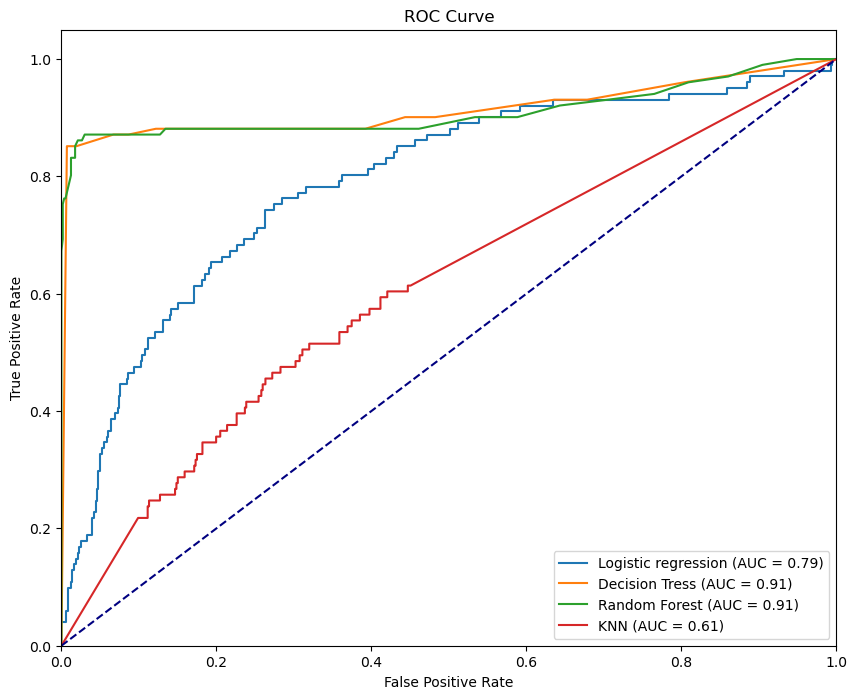

In [51]:
# Calculate the ROC curve
y_pred_lr = lr.predict_proba(x_test)[:, 1]
y_pred_Dt = dt3_tuned.predict_proba(x_test)[:, 1]
y_pred_rf = rf.predict_proba(x_test)[:, 1]
y_pred_knn =knn_1.predict_proba(x_test)[:, 1]

# Compute the ROC curve
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test, y_pred_lr)
fpr_Dt, tpr_Dt, thresholds_Dt = roc_curve(y_test, y_pred_Dt )
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_pred_rf)
fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test, y_pred_knn)

# Calculate the area under the ROC curve
auc_lr = roc_auc_score(y_test, y_pred_lr)
auc_Dt = roc_auc_score(y_test, y_pred_Dt )
auc_rf = roc_auc_score(y_test, y_pred_rf)
auc_knn = roc_auc_score(y_test, y_pred_knn)

# Plot the ROC curves
plt.figure(figsize=(10, 8))
plt.plot(fpr_lr, tpr_lr,  label='Logistic regression (AUC = {:.2f})'.format(auc_lr))
plt.plot(fpr_Dt, tpr_Dt,  label='Decision Tress (AUC = {:.2f})'.format(auc_Dt))
plt.plot(fpr_rf, tpr_rf,  label='Random Forest (AUC = {:.2f})'.format(auc_rf))
plt.plot(fpr_knn, tpr_knn,  label='KNN (AUC = {:.2f})'.format(auc_knn))


plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc='lower right');
plt.show()


From this we can note that the random forest was the best model and hence we can select the best features based on that model


In [52]:
#feature importance
# Get the feature importances
importances = rf.feature_importances_

# Create a dataframe to store the feature importances
feature_importances = pd.DataFrame({'feature': X_train_resampled.columns, 'importance': importances})

# Sort the dataframe by the feature importances in descending order
feature_importances = feature_importances.sort_values('importance', ascending=False)

# Print the first few rows of the feature importances
print(feature_importances.head(10))

                   feature  importance
12              Total cost    0.165485
64   international plan_no    0.146889
4         total day charge    0.102896
11  customer service calls    0.087916
10       total intl charge    0.044739
6         total eve charge    0.044250
1                area code    0.041684
8       total night charge    0.040897
7      total night minutes    0.038955
9         total intl calls    0.037349


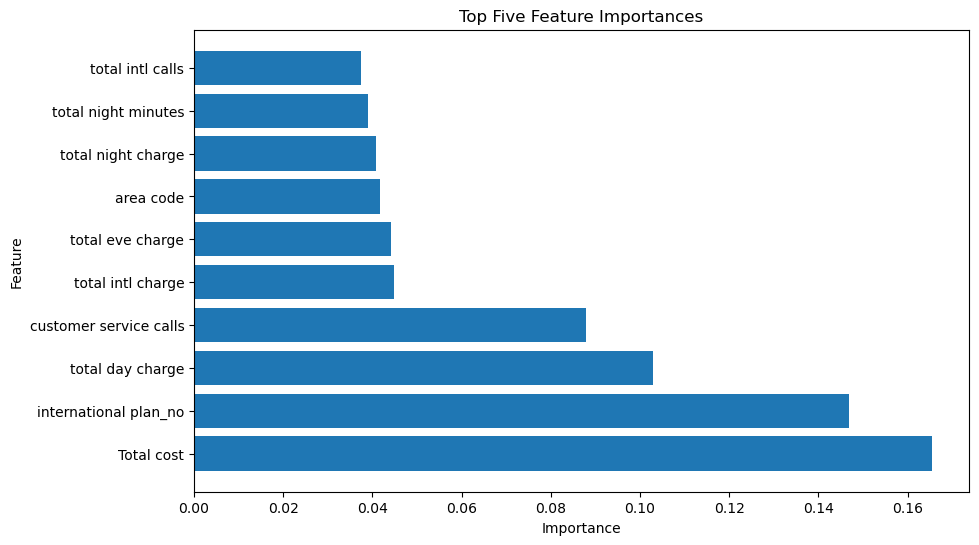

In [53]:
# Top ten important features
# Select the top ten features
top_features = feature_importances.head(10)

# Plot the feature importances for the top ten features
plt.figure(figsize=(10, 6))
plt.barh(top_features['feature'], top_features['importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top Five Feature Importances')
plt.show()

#### Conclusion

The random forest was our best model because:
1. Firstly, the model achieved a high recall score of 0.83. Recall, also known as sensitivity or true positive rate, measures the proportion of actual churn cases correctly identified by the model. In our case, a recall score of 0.83 implies that the random forest model can capture a significant number of churn cases, correctly identifying 83% of the actual instances of customers who are likely to churn. This high recall score is crucial because it aligns with our objective of identifying and mitigating churn effectively.
2. Secondly, the random forest model demonstrated an accuracy score of 0.94. Accuracy represents the overall correctness of the model's predictions. With an accuracy of 0.94, the random forest model can correctly classify churn cases 94% of the time. This indicates that the model performs well in accurately predicting churn, which is essential for making informed business decisions.
3. The model's substantial ability to balance precision and recall is reflected in its F1 score of 0.81. The F1 score combines precision and recall into a single metric, providing a balanced measure of a model's performance. A higher F1 score indicates that the model effectively identifies true positives while minimizing false positives and false negatives. In our case, the random forest model achieves an F1 score of 0.81, suggesting that it strikes a good balance between precision and recall, resulting in accurate identification of churn cases.
4. The random forest model exhibits good discrimination power, as evidenced by its AUC score of 0.897290. The AUC, is a widely used metric to assess the performance of binary classification models. It represents the model's ability to distinguish between positive and negative instances. With an AUC score of 0.897290, the random forest model demonstrates good discrimination power, indicating that it can effectively differentiate between customers likely to churn and those who are not.

After selecting the random forest model as the best performer, we delved into understanding the features that influenced its results. Our analysis identified the following features as the most influential:
  - Total cost    
  - International plan_no    
  - Total day charge    
  - Tustomer service calls    
  - Total intl charge   

Total cost: We observed that higher total costs were associated with a higher churn rate. This indicates that when customers incur greater expenses, they are more likely to churn. It suggests that the cost factor plays a significant role in customer retention.

International plan (no): Customers who did not have an international plan exhibited a higher churn rate. This implies that the absence of an international plan is correlated with an increased likelihood of churn. It suggests that offering international plans or incentives may help mitigate churn in this customer segment.

Total day charge: We found a positive correlation between higher total day charges and a higher churn rate. This suggests that customers with higher daytime calling charges are more likely to churn. It could indicate that customers perceive the cost of their daytime calls as a significant factor in their decision to switch service providers.

Customer service calls: Customers who had a higher frequency of customer service calls demonstrated a higher churn rate. This implies that a greater number of interactions with customer service may be an indicator of dissatisfaction or issues with the service, leading to churn. It highlights the importance of providing excellent customer service to improve retention.

Total international charge: We observed that a higher total international charge was associated with a higher churn rate. This suggests that customers with substantial international calling charges are more prone to churn. It indicates that managing international calling costs or providing suitable international calling plans could positively impact customer retention.

By understanding these influential features, we gain valuable insights into the factors driving churn and can devise targeted strategies to reduce churn rates. For instance, focusing on cost optimization, offering international plans, addressing customer service issues promptly, and managing international calling charges effectively can help improve customer retention and reduce churn in our business.

#### Recommendation

To effectively reduce the churn rate of customers from Syria Tel, it is recommended to implement the following measures:

1. Lower Total Cost of Calls: One significant factor influencing churn is the total cost of calls. By reducing the overall cost of calls for customers, especially during peak hours, you can provide them with cost-effective solutions. This strategy aims to make the service more affordable and attractive, potentially reducing the incentive for customers to switch to competitors.

2. Address Customer Service Issues: Customers who frequently contact customer service may have unresolved issues or concerns. It is crucial to prioritize addressing their problems promptly and efficiently. By providing excellent customer service and resolving issues effectively, you can improve customer satisfaction and loyalty, thereby reducing the likelihood of churn. Implementing customer feedback mechanisms and optimizing customer service processes can aid in this endeavor.

3. Encourage International Plan Adoption: Actively promoting and incentivizing customers to join the international plan can help reduce churn. By offering attractive features, such as discounted international calling rates or inclusive international minutes, you can encourage more customers to opt for the international plan. This strategy not only increases customer retention but also enhances revenue from international calling services.

4. Lower International Call Costs: High call costs for international calls can significantly contribute to customer churn. Lowering the rates for international calls or introducing cost-effective international calling packages can make Syria Tel a more appealing choice for customers who frequently engage in international communication. This measure aims to retain customers by providing competitive pricing and reducing the incentive to switch to other service providers.

It is important to monitor the effectiveness of these measures through ongoing analysis of churn rates, customer feedback, and market trends. Regularly evaluating and adapting these strategies based on customer needs and preferences will help optimize retention efforts and reduce churn effectively. Additionally, providing personalized offers, loyalty programs, and targeted marketing campaigns can further contribute to improving customer satisfaction and loyalty.